# **Bussiness Understanding** 

**Context**

Kita merupakan Data Scientist yang baru direkrut oleh perusahaan Hotel bintang 5. Tanggung jawab kita adalah untuk memprediksi kecenderungan pelanggan yang akan membatalkan pemesanan mereka di hotel kita atau tidak melalui fitur-fitur tertentu. Sebelum menunjuk kita sebagai Data Science, Hotel sering mengalami kerugian pendapatan karena pelanggan tiba-tiba membatalkan pemesanan kamar mereka sehingga kamar menjadi kosong dan tidak dapat ditempati oleh pelanggan lain.

**Problem Statement :**

Pembatalan dapat berdampak buruk pada hotel. Hilangnya pendapatan terjadi sebagai akibat dari kamar yang tidak terjual. No-show adalah pembatalan tanpa pemberitahuan.

Ketika sebuah hotel dihadapkan dengan pembatalan menit terakhir dan kemudian check-in menit terakhir, hotel tidak bisa berbuat banyak selain menjual kamar dengan harga yang jauh lebih rendah, jadi peluang untuk mendapatkan revenue yang maksimal sangat minim.

Dan kemudian, ada juga biaya penggunaan layanan Online Travel Agent (OTA) untuk check-in menit terakhir. Hotel harus membayar biaya tertentu kepada OTA karena OTA bertindak sebagai perantara mereka, sehingga menurunkan keuntungan.

Tetapi jika hotel tidak bergantung pada OTA atau tidak memiliki unduhan otomatis pemesanan dan pembatalan, maka waktu pemesanan dan pembatalan tinggi, dan lebih banyak waktu berarti biaya lebih tinggi.

**Goals :**

Bagaimana kita dapat memprediksi dan meminimalkan pembatalan pemesanan kamar oleh pelanggan sehingga hotel bisa mendapatkan keuntungan yang maksimal dan pendapatan tambahan dari Makanan dan Minuman dari pelanggan yang menginap di hotel, serta meningkatkan demand agar kamar hotel dapat terisi semua.

**Analytic Approach :**

Kita akan menganalisis faktor apa saja yang mempengaruhi pembatalan pemesanan kamar hotel dan menentukan pola pelanggan yang akan membatalkan pemesanan atau tidak.

Lalu kita akan coba untuk membangun model klasifikasi yang akan membantu perusahaan untuk dapat memprediksi probabilitas pelanggan yang akan membatalkan pesanannya atau tidak

**Metric Evaluation**

True-Positive : Kita memperkirakan bahwa pelanggan akan membatalkan pemesanan mereka dan ternyata benar mereka membatalkan pemesanannya
Konsekuensi: Kita dapat memaksimalkan keuntungan kita dengan mengisi kamar kita sepenuhnya, serta mendapatkan keuntungan tambahan dari layanan F&B.

False-Negative : Kita memperkirakan bahwa pelanggan tidak akan membatalkan pemesanan mereka dan ternyata mereka membatalkan pemesanan mereka
Konsekuensi: Kamar yang dibatalkan pelanggan akan tetap kosong dan hotel akan kehilangan keuntungan di kamar ini, sementara sebenarnya kita dapat mengisinya dengan pelanggan lain.

False Positive : Kita memperkirakan bahwa pelanggan akan membatalkan pemesanan mereka dan sebenarnya mereka tidak membatalkan pemesanan mereka
Konsekuensi: Kita akan kehilangan pelanggan,dan revenue yang di peroleh perusahaan akan berkurang karena kita salah memprediksi pelanggan yang berpotensial untuk menginap.

True-Negative : Kita memperkirakan bahwa pelanggan tidak akan membatalkan pemesanan mereka dan sebenarnya mereka tidak membatalkan pemesanan mereka
Konsekuensi: Mayoritas karakteristik pelanggan yang memesan kamar hotel.

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

# statistics
from scipy.stats import normaltest

# train test split
from sklearn.model_selection import train_test_split

# menyatukan beberapa tahap preprocessing atau fungsi lainnya
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# encoder dan scaler
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder, OrdinalEncoder
from sklearn.preprocessing import RobustScaler, MinMaxScaler, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, IterativeImputer

# resampler
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# algoritma ML
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import VotingClassifier, StackingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier

# cross validation untuk menentukan algoritma terbaik
from sklearn.model_selection import cross_val_score, StratifiedKFold

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# metrics untuk klasifikasi
from sklearn.metrics import f1_score, classification_report, confusion_matrix, precision_recall_curve, roc_auc_score, recall_score
from sklearn.metrics import fbeta_score, make_scorer

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data_hotel_booking_demand.csv')
df

,country,market_segment,previous_cancellations,booking_changes,deposit_type,days_in_waiting_list,customer_type,reserved_room_type,required_car_parking_spaces,total_of_special_requests,is_canceled
0,IRL,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0
1,FRA,Online TA,0,0,No Deposit,0,Transient,A,0,2,0
2,PRT,Online TA,0,1,No Deposit,0,Transient,A,0,2,0
3,NLD,Online TA,0,0,No Deposit,0,Transient,A,0,1,1
4,PRT,Online TA,0,2,No Deposit,0,Transient,A,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...
83568,PRT,Online TA,0,0,No Deposit,0,Contract,A,0,3,1
83569,FRA,Online TA,0,0,No Deposit,0,Transient,D,0,2,0
83570,PRT,Online TA,0,1,No Deposit,0,Transient,D,0,3,0
83571,CN,Offline TA/TO,0,0,No Deposit,0,Transient-Party,A,0,0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83573 entries, 0 to 83572
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   country                      83222 non-null  object
 1   market_segment               83573 non-null  object
 2   previous_cancellations       83573 non-null  int64 
 3   booking_changes              83573 non-null  int64 
 4   deposit_type                 83573 non-null  object
 5   days_in_waiting_list         83573 non-null  int64 
 6   customer_type                83573 non-null  object
 7   reserved_room_type           83573 non-null  object
 8   required_car_parking_spaces  83573 non-null  int64 
 9   total_of_special_requests    83573 non-null  int64 
 10  is_canceled                  83573 non-null  int64 
dtypes: int64(6), object(5)
memory usage: 7.0+ MB


In [5]:
df.describe()

,previous_cancellations,booking_changes,days_in_waiting_list,required_car_parking_spaces,total_of_special_requests,is_canceled
count,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000,83573.000000
mean,0.086798,0.220897,2.330561,0.062999,0.573211,0.368277
std,0.841011,0.648635,17.673051,0.246919,0.795163,0.482340
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,26.000000,21.000000,391.000000,8.000000,5.000000,1.000000


In [6]:
df.describe(include='object')

,country,market_segment,deposit_type,customer_type,reserved_room_type
count,83222,83573,83573,83573,83573
unique,162,8,3,4,10
top,PRT,Online TA,No Deposit,Transient,A
freq,34097,39460,73352,62732,60041


In [7]:
df.isna().sum()

country                        351
market_segment                   0
previous_cancellations           0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
reserved_room_type               0
required_car_parking_spaces      0
total_of_special_requests        0
is_canceled                      0
dtype: int64

terdapat missing value pada kolom `country` sejumlah 351

In [8]:
df.duplicated().sum()

73371

Terdapat data duplikat sebanyak 73.371 data

In [9]:
pd.set_option('display.max_colwidth', None)
listItem = []
for col in df.columns :
 
    listItem.append( [col, df[col].nunique(), df[col].unique()   ])

unique_values = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
unique_values

,Column Name,Number of Unique,Unique Sample
0,country,162,"[IRL, FRA, PRT, NLD, ESP, UMI, CN, LUX, BRA, BEL, JPN, DEU, ITA, CHE, GBR, AGO, SRB, COL, CHN, SWE, AUT, CIV, CZE, POL, USA, SGP, RUS, ROU, DNK, IND, MAR, PHL, ARG, ISL, ZAF, LBN, MOZ, TUR, BGD, MEX, CAF, NOR, FIN, UKR, EGY, ISR, nan, KOR, AZE, HUN, AUS, EST, CHL, SVN, PRY, ABW, ALB, LTU, ARE, HRV, SAU, NZL, LVA, ATA, KAZ, DZA, TWN, CRI, BIH, BGR, IRQ, OMN, VEN, IDN, GEO, MLT, IRN, BLR, URY, LBY, TUN, BEN, MYS, MWI, GRC, CYP, CPV, HKG, PRI, MKD, MUS, IMN, PAN, NGA, GLP, KHM, PER, QAT, SEN, MAC, ...]"
1,market_segment,8,"[Offline TA/TO, Online TA, Direct, Groups, Corporate, Complementary, Aviation, Undefined]"
2,previous_cancellations,15,"[0, 1, 25, 2, 3, 11, 24, 13, 6, 26, 14, 4, 19, 5, 21]"
3,booking_changes,19,"[0, 1, 2, 5, 3, 4, 6, 7, 9, 8, 17, 10, 13, 12, 14, 21, 16, 20, 15]"
4,deposit_type,3,"[No Deposit, Non Refund, Refundable]"
5,days_in_waiting_list,115,"[0, 3, 39, 87, 77, 215, 97, 162, 46, 79, 4, 31, 122, 34, 57, 259, 50, 17, 32, 43, 75, 69, 44, 22, 113, 58, 38, 65, 48, 236, 176, 25, 108, 91, 19, 160, 68, 28, 63, 35, 42, 59, 24, 8, 183, 187, 21, 111, 56, 98, 101, 15, 16, 47, 93, 45, 14, 70, 10, 49, 178, 99, 60, 40, 85, 223, 6, 33, 391, 20, 1, 41, 147, 55, 80, 379, 150, 61, 330, 174, 107, 96, 18, 62, 13, 30, 120, 27, 207, 71, 2, 76, 125, 5, 9, 224, 53, 83, 84, 12, ...]"
6,customer_type,4,"[Transient-Party, Transient, Contract, Group]"
7,reserved_room_type,10,"[A, E, D, F, B, G, C, H, L, P]"
8,required_car_parking_spaces,5,"[0, 1, 2, 8, 3]"
9,total_of_special_requests,6,"[0, 2, 1, 3, 4, 5]"


## **Simple EDA**

In [10]:
numerical_features = df.drop(columns=['is_canceled']).describe().columns

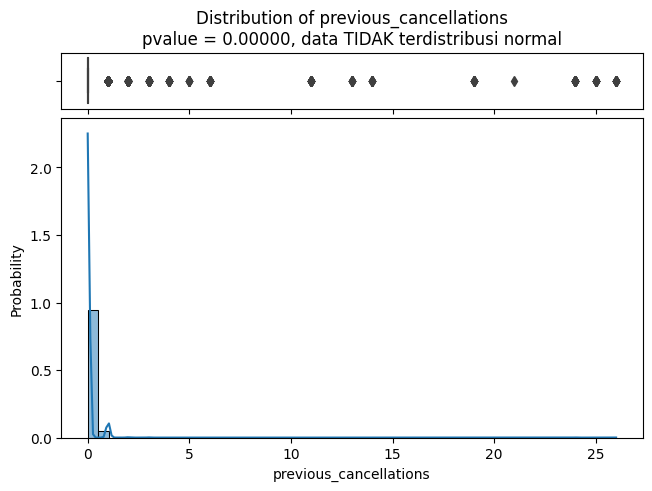

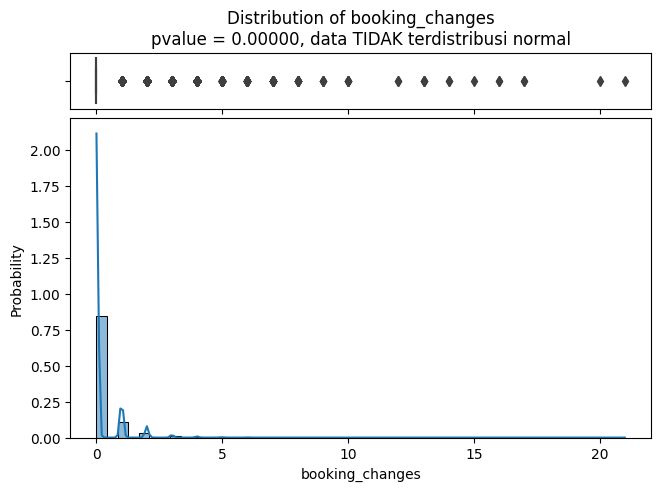

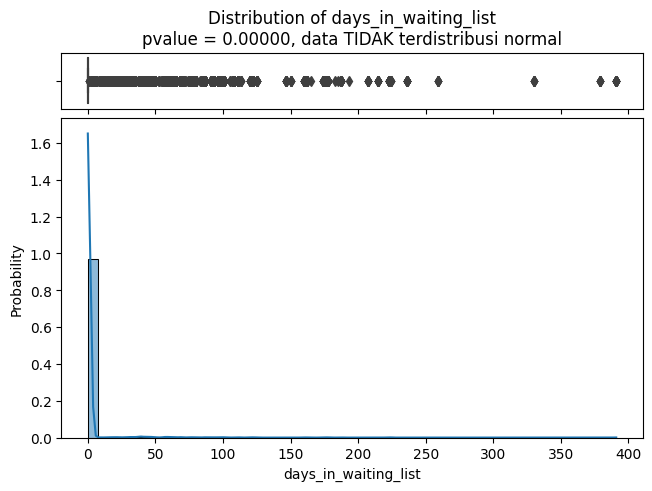

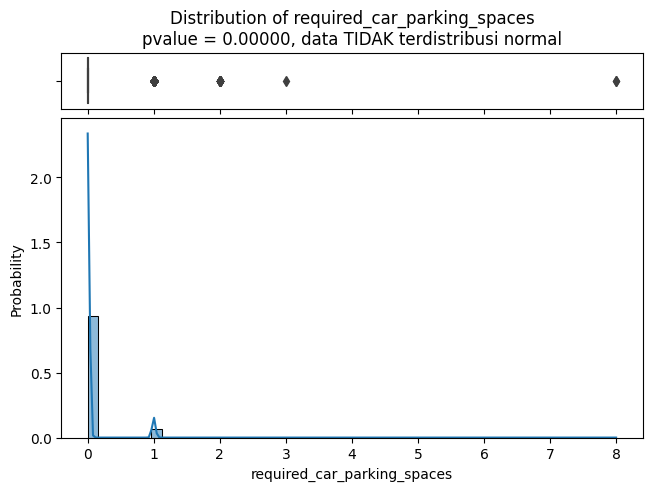

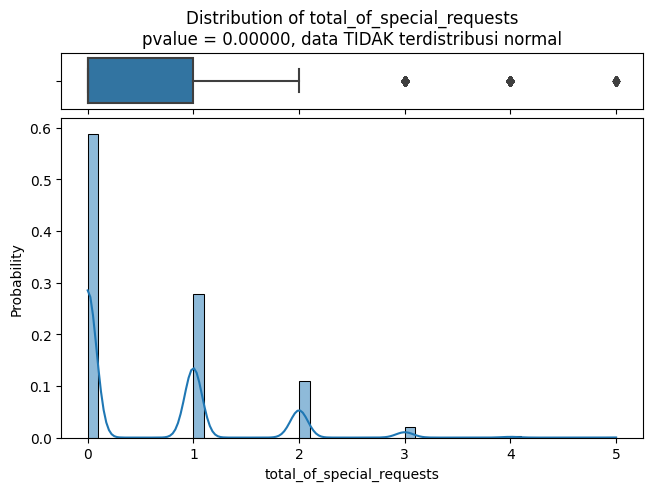

In [11]:
for kolom in numerical_features:

    fig, (ax1, ax2) = plt.subplots(2, sharex = True, figsize = (7.5,5), 
                                    gridspec_kw={"height_ratios": (.15, .85),
                                                "hspace": 0.05})

    stat, pvalue = normaltest(df[kolom].dropna())

    if pvalue > 0.05 :
        distribusi = f'pvalue = {pvalue:.5f}, data terdistribusi normal'
    else :
        distribusi = f'pvalue = {pvalue:.5f}, data TIDAK terdistribusi normal'

    ax1.set_title(f"Distribution of {kolom}\n{distribusi}", color = "black")
    sns.boxplot(x = df[kolom], ax = ax1)
    ax1.set(xlabel = "")

    sns.histplot(data = df[kolom], ax = ax2, stat = "probability", kde=True, bins=50)

    plt.show()

Berdasarkan gambar diatas kita ketahui bahwa data tidak terdistribusi normal dan semuanya ada pada right skewness

In [12]:
categorical_features = df.describe(include='object').columns

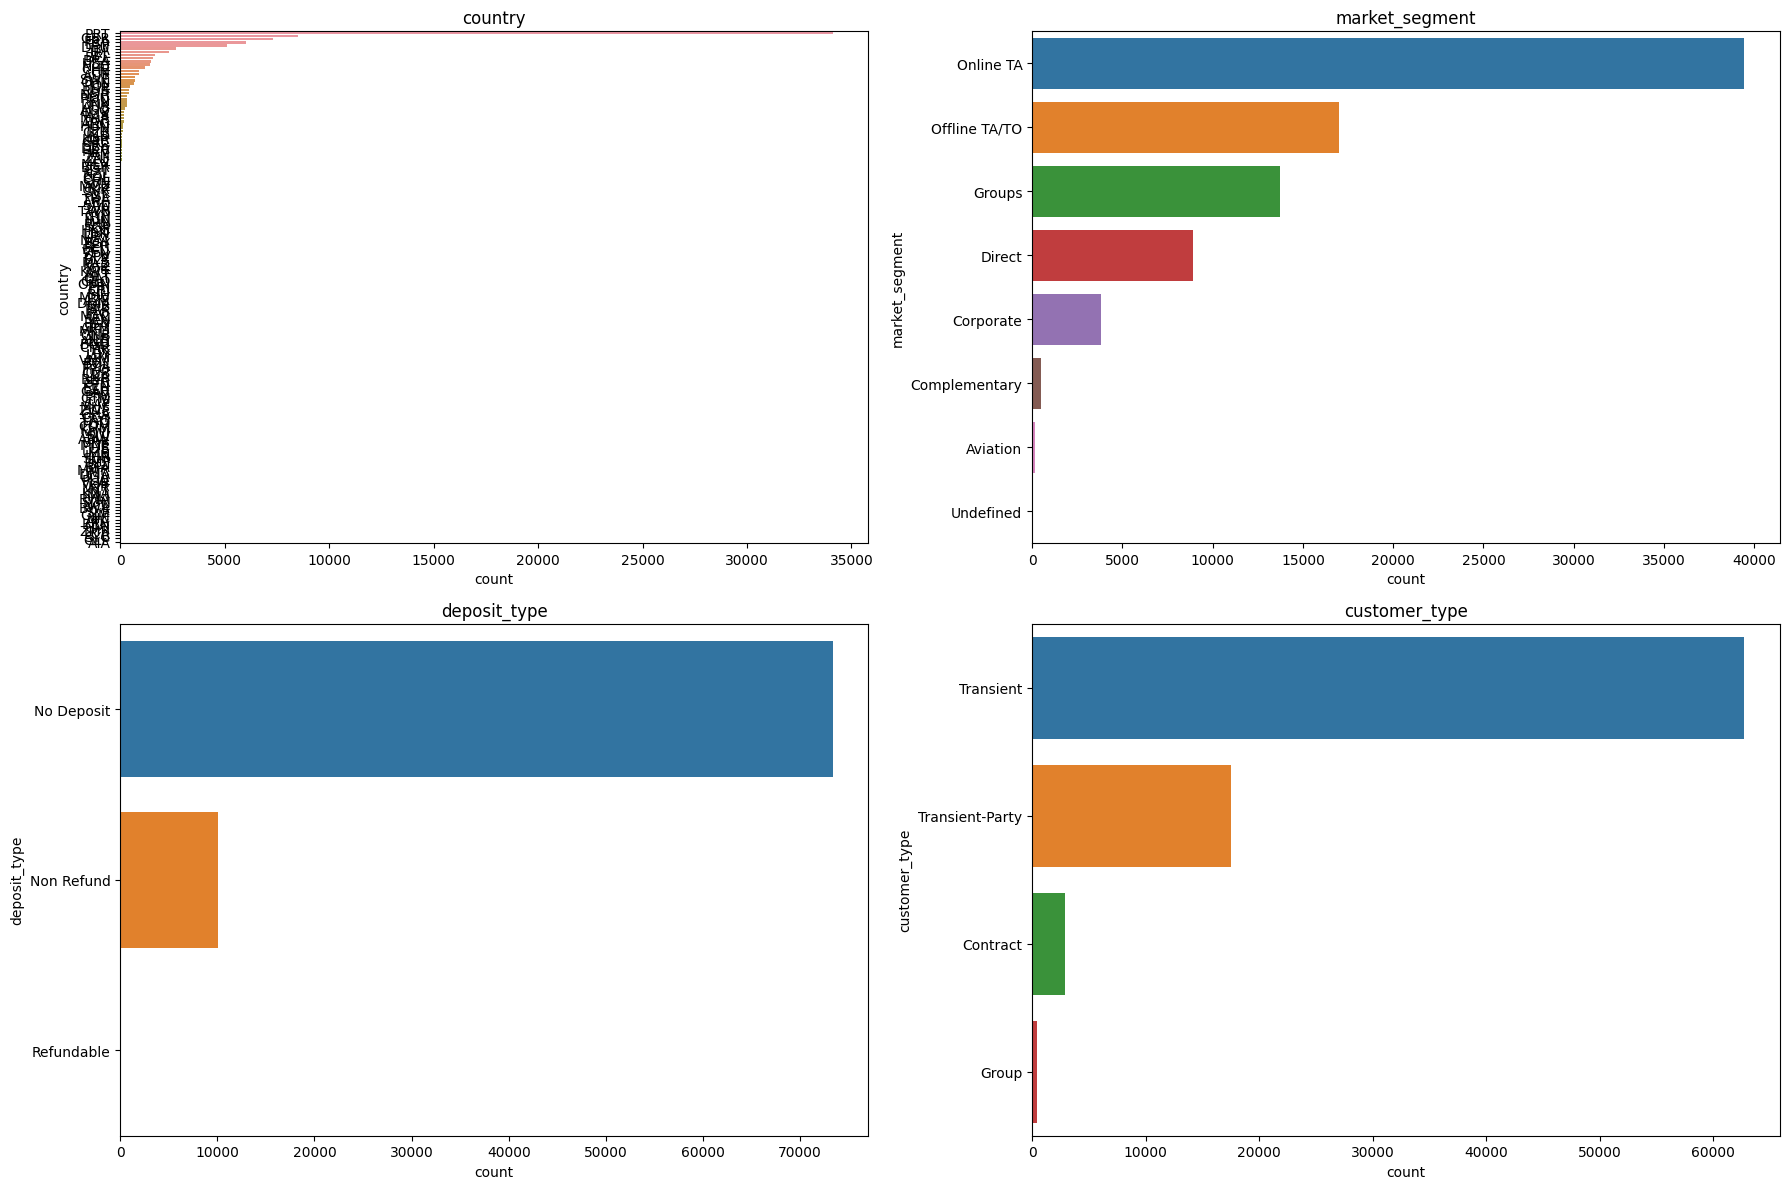

In [13]:
fig, axes = plt.subplots(2, 2, figsize=(18, 12)) 
for i, j in zip(categorical_features, axes.flatten()):
    ax = sns.countplot(data=df, y= i, ax= j, order=df[i].value_counts().index)
    ax.set_title(f'{i}',size = 12) 
plt.tight_layout()

plt.show()

- Terlihat bahwa pada kolom `market_segment` ternyata paling banyak adalah `online TA` yaitu adalah online travel agent
- Terlihat bahwa pada kolom `deposit_type` ternyata paling banyak adalah `no deposit` yaitu tidak adanya uang deposit
- Terlihat bahwa pada kolom `customer_type` ternyata paling banyak adalah `transient` yaitu pelnggan hotel yang menyewa per jam ataupun harian

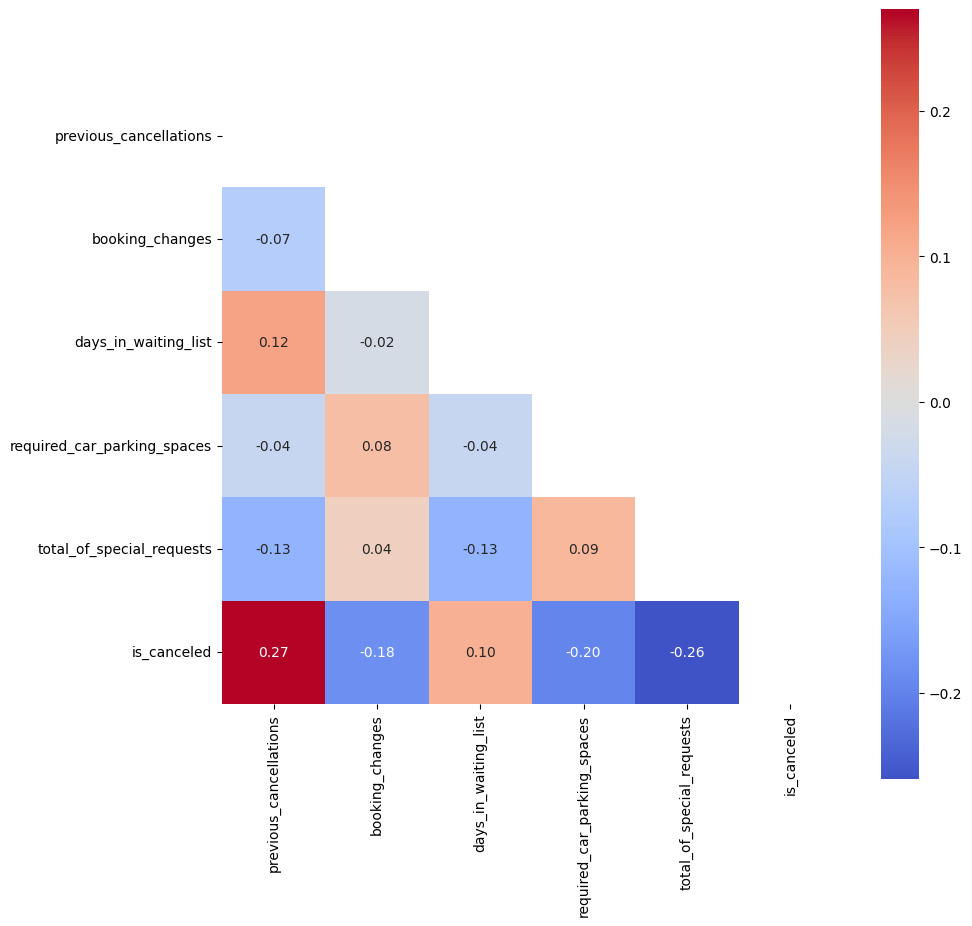

In [14]:
plt.figure(figsize=(10,10))

matrix = np.triu(df.corr(method='spearman',numeric_only=True))

sns.heatmap(data=df.corr(method='spearman',numeric_only=True), annot=True, fmt='.2f', cmap='coolwarm', center=0, mask = matrix, square='True')
plt.show()

Berdasarkan heatmap diatas kita dapat menyimpulkan beberapa hal :

1. Customers yang sering melakukan cancellation booking sebelumnya `(previous_cancellation)` cenderung akan melakukan booking cancellation lagi kedepannya
2. Customers yang tidak melakukan cancellation booking ternyata mayoritas melakukan `booking_changes` sebelumnya. Semantara itu customer yang melakukan cancellation mayoritas yang jarang melakukan `booking_changes`
3. Untuk table `days_in_waiting_list`, kita tidak bisa menebak customer yang sudah menunggu dalam periode waktu yang singkat atau yang bahkan setahun lebih akan membatalkan pemesanan atau tidak. Namun kita bisa berasumsi bahwa cutsomer yang sudah menunggu lama tidak akan membatalkan pemesanan kamar karena mereka akan merasa waktunya terbuang sia-sia hanya untuk menunggu dan mereka bisa melewatkan kesempatan-kesempatan untuk memesan kamar yang lain sehingga customers akan rela menunggu dalam waktu yang lama sampai kamar yang mereka pesan bisa di tempati.
4. Pada table `required_car_parking_spaces`, customer yang request tempat parkir dalam pemesanan kamarnya tidak membatalkan transaksi pemesanan kamar mereka dan tidak ada pelanggan yang membatalkan pemesanan mereka meminta tempat parkir terhadap hotel tersebut.
5. Customer yang memiliki special request `(total_of_special_request)` lebih memilih untuk tidak membatalkan pemesanan kamar dibandingkan yang tidak memiliki special request

## **Data Analysis**

### **Plot of numerical features vs target**

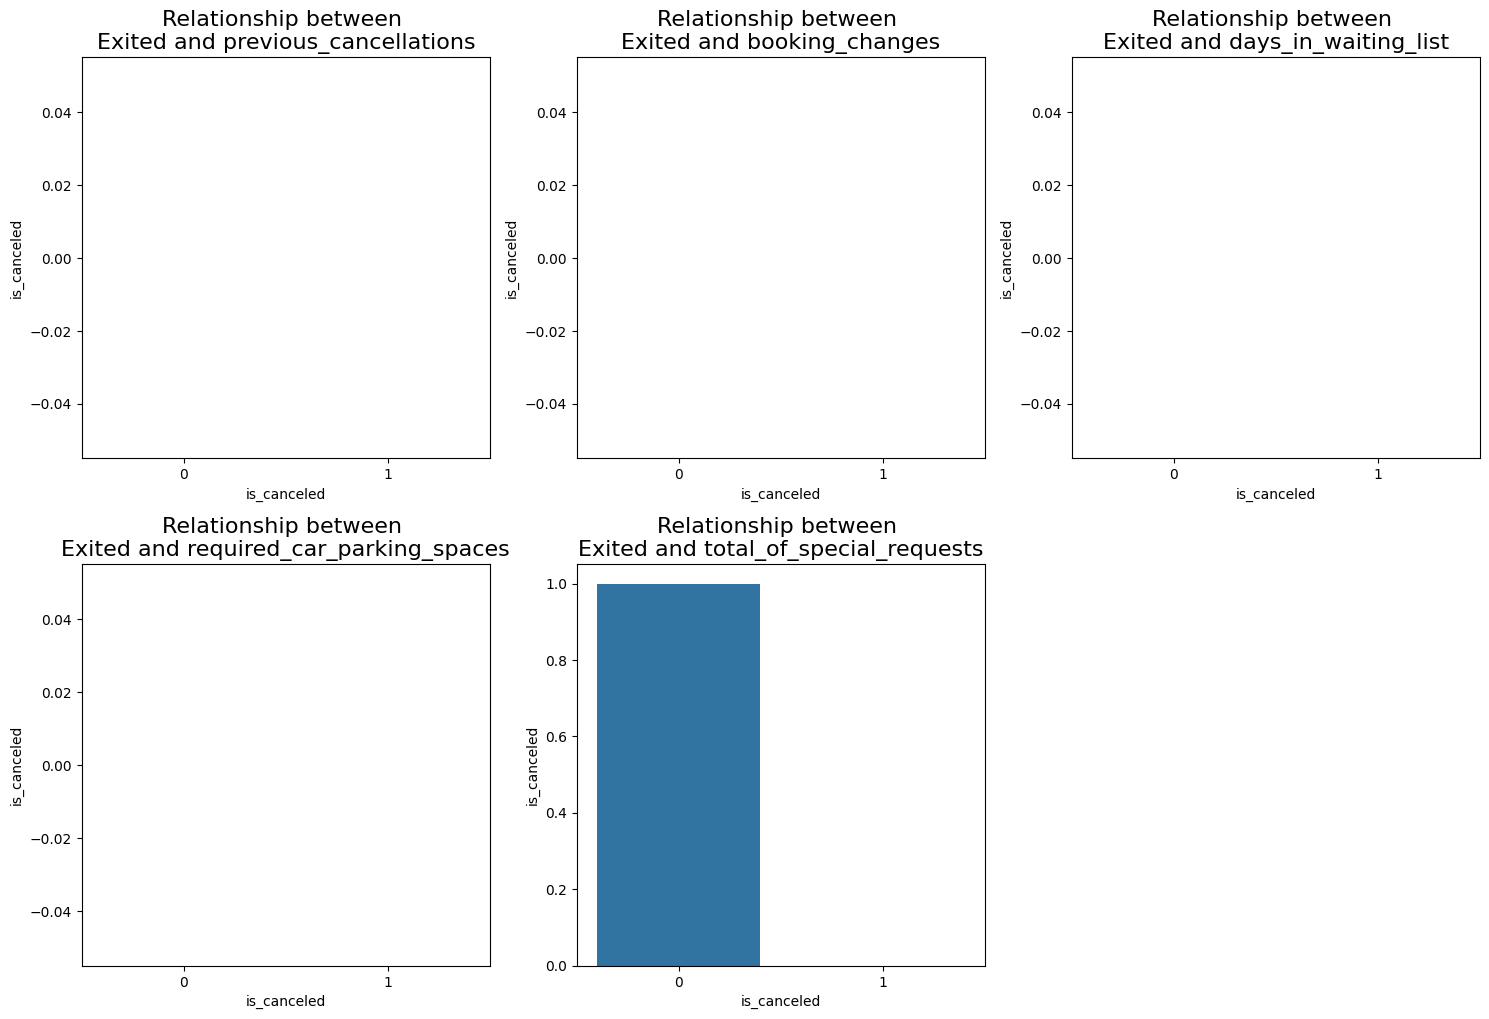

In [15]:
plt.figure(figsize=(15, 20))
plotnumber = 1

for feature in numerical_features:
    ax = plt.subplot(4, 3, plotnumber)
    sns.barplot(x = 'is_canceled', y = feature, data = df, estimator=np.median, ci=0)
    plt.ylabel('is_canceled')
    plt.title(f'Relationship between \nExited and {feature}', fontsize=16)
    plotnumber += 1
    plt.tight_layout();

### **Plot of categorical features vs target**

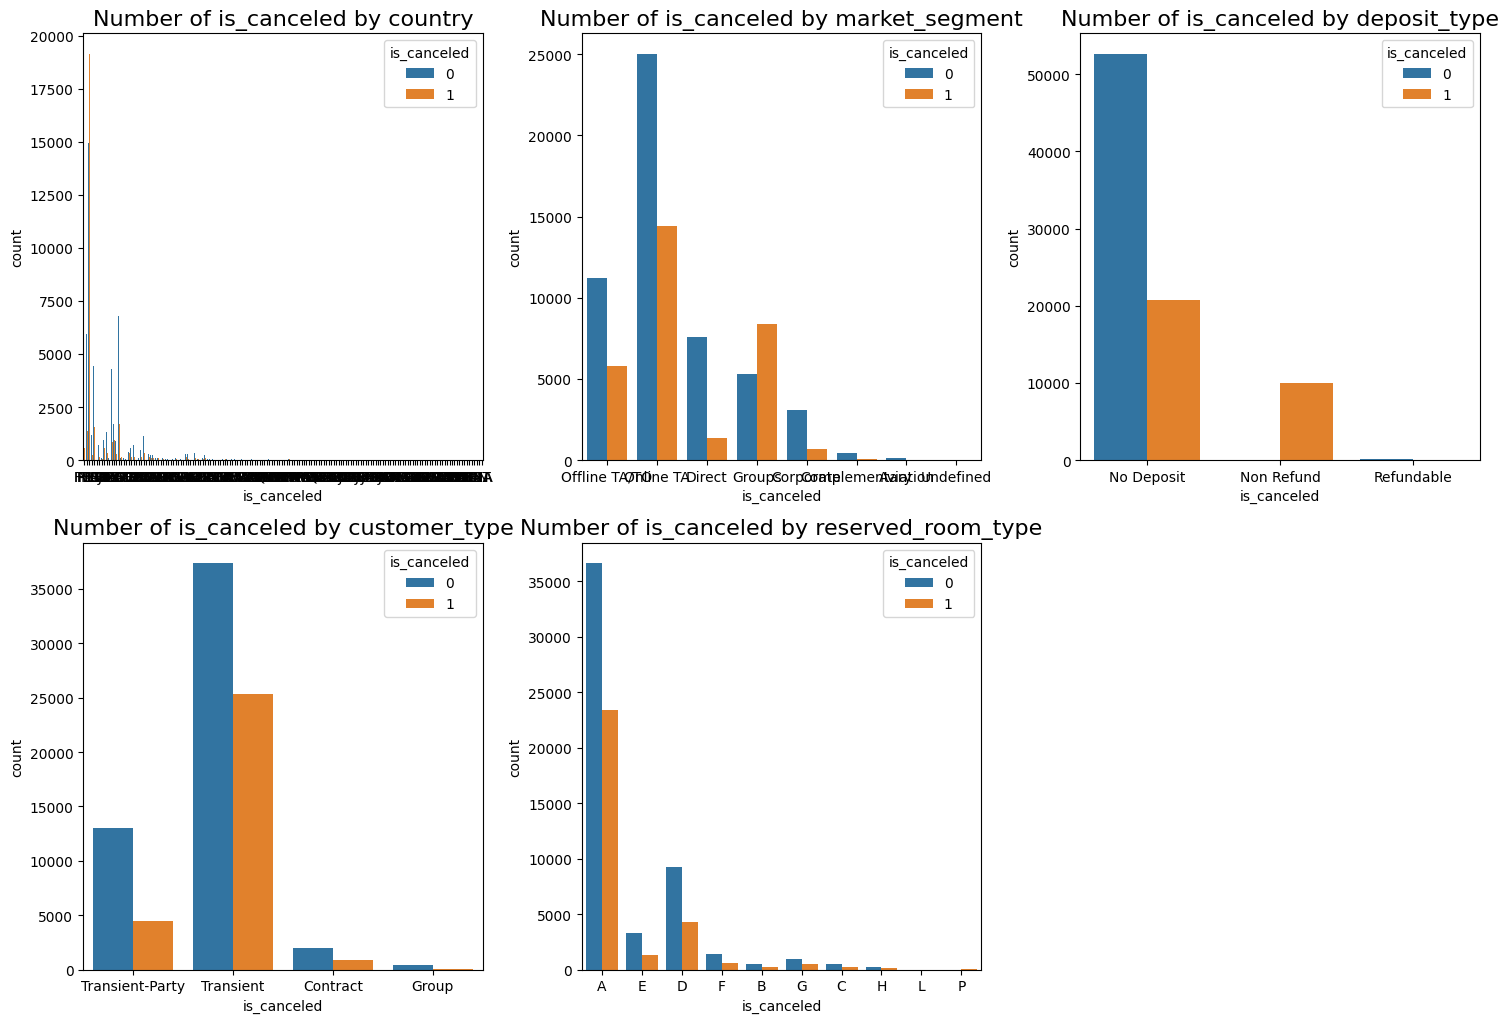

In [16]:
plt.figure(figsize=(15, 15))
plotnumber = 1

for feature in categorical_features:
    ax = plt.subplot(3, 3, plotnumber)
    sns.countplot(hue = 'is_canceled', x = feature, data = df)
    plt.xlabel('is_canceled')
    plt.title(f'Number of is_canceled by {feature}', fontsize=16)
    plotnumber += 1
    plt.tight_layout();

## **Data Preprocessing**

In [17]:
# define imputer
imp_constant = SimpleImputer(strategy='constant', fill_value='Other')

# fit and transform
df[['country']] = imp_constant.fit_transform(df[['country']])


In [18]:
df.shape

(83573, 11)

In [19]:
df = df.drop_duplicates().reset_index(drop=True)

In [20]:
df.shape

(10202, 11)

In [21]:
df.isna().sum()

country                        0
market_segment                 0
previous_cancellations         0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
reserved_room_type             0
required_car_parking_spaces    0
total_of_special_requests      0
is_canceled                    0
dtype: int64

**Handling Outliers**

In [22]:
# mencari nilai lower dan upper fence pada masing-masing kolom numerikal

list_lower = []
list_upper = []
number_lower = []
number_inside = []
number_upper = []
percentage_outlier = []

for feature in numerical_features: 
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    lower_fence = df[feature].quantile(0.25) - 1.5*IQR
    upper_fence = df[feature].quantile(0.75) + 1.5*IQR
    list_lower.append(lower_fence)
    list_upper.append(upper_fence)
    number_lower.append(len(df[df[feature]<lower_fence]))
    number_inside.append(len(df[(df[feature]>=lower_fence) & (df[feature]<=upper_fence)]))
    number_upper.append(len(df[df[feature]>upper_fence]))
    percentage_outlier.append(round((len(df[df[feature]<lower_fence]) + len(df[df[feature]>upper_fence])) / len(df)  *100, 2))

outliers = pd.DataFrame({
    'Kolom' : numerical_features,
    'Lower' : list_lower,
    'Upper' : list_upper,
    '# Lower' : number_lower,
    '# Inside' : number_inside,
    '# Upper' : number_upper,
    '% Outlier' : percentage_outlier
})

outliers

,Kolom,Lower,Upper,# Lower,# Inside,# Upper,% Outlier
0,previous_cancellations,0.0,0.0,0,9812,390,3.82
1,booking_changes,-1.5,2.5,0,9378,824,8.08
2,days_in_waiting_list,0.0,0.0,0,9737,465,4.56
3,required_car_parking_spaces,0.0,0.0,0,8535,1667,16.34
4,total_of_special_requests,-3.0,5.0,0,10202,0,0.00


In [23]:
# proporsi target pada dataset awal
df['is_canceled'].value_counts()/len(df) * 100

is_canceled
0    76.337973
1    23.662027
Name: count, dtype: float64

In [24]:
# proporsi target untuk data outlier pada kolom previous_cancellations
df[df['previous_cancellations']>0]['is_canceled'].value_counts()/len(df[df['previous_cancellations']>0]) * 100

is_canceled
1    62.307692
0    37.692308
Name: count, dtype: float64

In [25]:
# proporsi target untuk data outlier pada kolom booking_changes
df[df['booking_changes']>2.5]['is_canceled'].value_counts()/len(df[df['booking_changes']>2.5]) * 100

is_canceled
0    82.281553
1    17.718447
Name: count, dtype: float64

In [26]:
# proporsi target untuk data outlier pada kolom days_in_waiting_list
df[df['days_in_waiting_list']>0]['is_canceled'].value_counts()/len(df[df['days_in_waiting_list']>0]) * 100

is_canceled
0    65.16129
1    34.83871
Name: count, dtype: float64

In [27]:
# proporsi target untuk data outlier pada kolom required_car_parking_spaces	
df[df['required_car_parking_spaces']>0]['is_canceled'].value_counts()/len(df[df['required_car_parking_spaces']>0]) * 100

is_canceled
0    100.0
Name: count, dtype: float64

Dari semua outlier sata tidak akan membuang datanya karena semua proporsinya tidak ada yang sama dengan data awal

**Encoding**

In [28]:
# menampilkan jumlah unik dan unique values untuk setiap kolom
pd.set_option('display.max_colwidth', None)
# data unik di tiap kolom
listItem = []
for col in categorical_features :
    listItem.append( [col, df[col].nunique(), df.sort_values(col)[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Values'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Values
0,country,163,"[ABW, AGO, AIA, ALB, AND, ARE, ARG, ARM, ATA, AUS, AUT, AZE, BDI, BEL, BEN, BFA, BGD, BGR, BHR, BIH, BLR, BOL, BRA, BRB, BWA, CAF, CHE, CHL, CHN, CIV, CMR, CN, COL, COM, CPV, CRI, CUB, CYM, CYP, CZE, DEU, DMA, DNK, DOM, DZA, ECU, EGY, ESP, EST, ETH, FIN, FRA, FRO, GAB, GBR, GEO, GGY, GHA, GIB, GLP, GNB, GRC, GTM, HKG, HRV, HUN, IDN, IMN, IND, IRL, IRN, IRQ, ISL, ISR, ITA, JAM, JEY, JOR, JPN, KAZ, KEN, KHM, KIR, KNA, KOR, KWT, LAO, LBN, LBY, LCA, LIE, LKA, LTU, LUX, LVA, MAC, MAR, MDV, MEX, MKD, ...]"
1,market_segment,8,"[Aviation, Complementary, Corporate, Direct, Groups, Offline TA/TO, Online TA, Undefined]"
2,deposit_type,3,"[No Deposit, Non Refund, Refundable]"
3,customer_type,4,"[Contract, Group, Transient, Transient-Party]"
4,reserved_room_type,10,"[A, B, C, D, E, F, G, H, L, P]"


Sekarang mari kita melakukan fitur encoding untuk fitur-fitur categorical yang kita miliki.
Yang akan kita lakukan adalah :


1. Merubah fitur/kolom `market_segment, deposit_type, customer_type` dan `reserved_room_type` menggunakan One Hot Encoding, karena fitur ini tidak memiliki urutan/tidak ordinal, dan juga jumlah unique datanya hanya sedikit.
2. Merubah fitur/kolom `country` menjadi integer dengan Binary Encoding. karena fitur ini tidak memiliki urutan/tidak ordinal, tetapi jumlah unique datanya banyak.

In [29]:
# transformer 
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop= 'first',handle_unknown='ignore'), ['market_segment', 'deposit_type', 'customer_type', 'reserved_room_type']),
    ('binary', BinaryEncoder(), ['country']),
], remainder='passthrough')

**Scaling**

Kita akan menggunakan Robust Scaler karena data kita memiliki outlier dan Robust Scaler tidak akan terpengaruh oleh outlier. Namun kita dapat mengatur ulang scaler nantinya untuk mendapatkan scaler terbaik.

In [30]:
# scaling features 
robust = RobustScaler()

# for tuning
standard = StandardScaler()
minmax = MinMaxScaler()

In [31]:
df['is_canceled'].value_counts() / len(df)

is_canceled
0    0.76338
1    0.23662
Name: count, dtype: float64

Kita dapat melihat bahwa dataset tidak seimbang (mild imbalance) karena proporsi kelas minoritas sebesar 23.7%.\
Untuk mensiasati hal tersebut nantinya kita dapat menguji apakah modelling perlu menerapkan metode resampling agar data kita memiliki distribusi kelas yang lebih seimbang atau tidak.

Adapun metode resampling yang akan dipakai adalah SMOTE. Namun kita dapat mengatur ulang resampler nantinya untuk mendapatkan resampler terbaik.

In [32]:
smote = SMOTE(random_state=0)
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

## **Define Features (X) and Target (y)**

In [33]:
# Features
X = df.drop(columns='is_canceled')

# target
y = df['is_canceled']

## **Data Splitting**

In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, 
    y,
    test_size=0.2,
    random_state=0,
    stratify=y
)

## **Model Benchmark**

In [35]:
from xgboost.sklearn import XGBClassifier

In [36]:
# Decision Tree
tree = DecisionTreeClassifier(random_state=0)

# KNN
knn = KNeighborsClassifier()

# Logistic Regression
logreg = LogisticRegression(random_state=0)

# RandomForest
rf = RandomForestClassifier(random_state=0)

# Adaboost
adaboost = AdaBoostClassifier(random_state=0)

# Gradientboost
gradboost = GradientBoostingClassifier(random_state=0)

# ExtremeGradientBoost
xgboost = XGBClassifier(random_state=0, verbosity=0)

In [37]:
models = [tree, rf, adaboost, gradboost, xgboost, logreg, knn]

list_mean = []
list_std = []
list_score = []

for algoritma in models:

    pipe_model =Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('resampler', smote),
        ('model', algoritma)
    ])

    skfold = StratifiedKFold(n_splits=5)

    model_cv = cross_val_score(
        estimator=pipe_model,
        X=X_train,
        y=y_train,
        cv=skfold,
        scoring= 'recall',
        error_score='raise'
    )

    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())
    list_score.append(model_cv.round(3))

In [38]:
pd.DataFrame({
    'model' : ['Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XGBoost', 'Logistic Regression', 'KNN'],
    'mean recall' : list_mean,
    'std recall' : list_std,
    'score' : list_score
}).sort_values('mean recall', ascending=False)

,model,mean recall,std recall,score
5,Logistic Regression,0.775234,0.017813,"[0.798, 0.759, 0.759, 0.795, 0.764]"
2,Ada Boost,0.654584,0.017374,"[0.654, 0.645, 0.635, 0.687, 0.653]"
3,Gradient Boost,0.647342,0.041836,"[0.63, 0.585, 0.632, 0.694, 0.694]"
6,KNN,0.642164,0.015760,"[0.623, 0.627, 0.645, 0.666, 0.65]"
4,XGBoost,0.411715,0.028764,"[0.39, 0.373, 0.407, 0.44, 0.448]"
1,Random Forest,0.319532,0.017991,"[0.302, 0.298, 0.347, 0.329, 0.321]"
0,Decision Tree,0.270844,0.012747,"[0.271, 0.249, 0.269, 0.288, 0.277]"


## **Predict Benchmark Model to Test Set**

In [39]:
list_recall_score = []

# Mencari model terbaik berdasarkan f1 score terbesar dan std terkecil
for algoritma in models :

    pipe_model=Pipeline([
        ('preprocess', transformer),
        ('scaler', robust),
        ('resampler', smote),
        ('model', algoritma)
    ])

    # fitting
    pipe_model.fit(X_train, y_train)

    # predict
    y_pred = pipe_model.predict(X_test)

    # evaluate
    score = fbeta_score(y_test, y_pred, beta=1)
    list_recall_score.append(score)

In [40]:
# Perbandingan performa antar model
pd.DataFrame({
    'model':['Decision Tree', 'Random Forest', 'Ada Boost', 'Gradient Boost', 'XGBoost', 'Logistic Regression', 'KNN'],
    'recall_score (test_set)': list_recall_score
}).sort_values('recall_score (test_set)', ascending=False)

,model,recall_score (test_set)
3,Gradient Boost,0.577933
5,Logistic Regression,0.557353
2,Ada Boost,0.554522
4,XGBoost,0.498294
6,KNN,0.447670
1,Random Forest,0.323253
0,Decision Tree,0.298947


Disini karena yang paling mendekati cros val adalah model Gradient Boost dan Ada Boost, maka model yang akan coba dituning adalah kedua model tersebut. walaupun semua modelnya tidak stabil

## **Hyperparameter Tuning**

**AdaBoost**

In [41]:
# learning rate
learning_rate = list(np.arange(0.01,1, 0.01))

# jumlah pohon
n_estimators = list(np.arange(50,500))

# algoritma untuk mencari AdaBoost terbaik
algorithm = ['SAMME', 'SAMME.R']

# Hyperparameter space Adaboost
hyperparam_space_adaboost = {
    'resampler':[smote, rus, ros, None],
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__algorithm':algorithm,

}

In [42]:
# Benchmark model 1
adaboost = AdaBoostClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_adaboost = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust),
    ('resampler', smote), 
    ('model', adaboost)
    ])

# Hyperparameter tuning
random_adaboost = RandomizedSearchCV(
    estimator=estimator_adaboost, 
    param_distributions = hyperparam_space_adaboost, 
    cv = skf, 
    scoring = 'recall', 
    n_jobs = -1, 
    random_state=0,
    n_iter=1000
)

In [43]:
# fitting 
random_adaboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['market_segment',
                                                                                'deposit_type',
                                                                                'customer_type',
                                                                                'reserved_room_type']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['country'])...
                                                                 0.21000000000000002,
                                                                 0.22, 0.23,
                                                                 0.24000000000000002,
                                                                 0.25, 0.26,
                                                                 0.27, 0.28,
                                                                 0.29000000000000004,
                                                                 0.3, ...],
                                        'model__n_estimators': [50, 51, 52, 53,
                                                                54, 55, 56, 57,
                                                                58, 59, 60, 61,
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      None]},
                   random_state=0, scoring='recall')

In [44]:
# score  terbaik
random_adaboost.best_score_

1.0

In [45]:
random_adaboost.best_params_

{'resampler': RandomUnderSampler(random_state=0),
 'model__n_estimators': 219,
 'model__learning_rate': 0.05,
 'model__algorithm': 'SAMME'}

**GradientBoostingClassifier**

In [46]:
# kedalaman pohon
max_depth = list(np.arange(1,10))

# learning rate
learning_rate = list(np.arange(0.01,1, 0.01))

# jumlah pohon
n_estimators = list(np.arange(50,500))

# jumlah baris train set tiap pohon (% dari total baris train set)
subsample = list(np.arange(0.2,1,0.1))

# jumlah feature yang digunakan untuk pertimbangan splitting (% dari total kolom train set)
max_features = list(np.arange(1,10))

# Hyperparameter space Gradient Boosting
hyperparam_space_gradboost = {
    'resampler':[smote, rus, ros, None],
    'model__max_depth':max_depth , 
    'model__learning_rate':learning_rate,
    'model__n_estimators':n_estimators,
    'model__subsample':subsample,
    'model__max_features':max_features
}

In [47]:
# Benchmark model 2
gradboost = GradientBoostingClassifier(random_state=0)

# Stratified cross validation
skf = StratifiedKFold(n_splits = 5)

# Create the algorithm chains
estimator_gradboost = Pipeline([
    ('preprocess', transformer),
    ('scaler', robust),
    ('resampler', smote), 
    ('model', gradboost)
    ])

# Hyperparameter tuning
random_gradboost = RandomizedSearchCV(
    estimator=estimator_gradboost, 
    param_distributions = hyperparam_space_gradboost, 
    cv = skf, 
    scoring = 'recall', 
    n_jobs = -1, 
    random_state=0,
    n_iter=1000
)

In [48]:
# fitting 
random_gradboost.fit(X_train, y_train)

RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   estimator=Pipeline(steps=[('preprocess',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(drop='first',
                                                                                             handle_unknown='ignore'),
                                                                               ['market_segment',
                                                                                'deposit_type',
                                                                                'customer_type',
                                                                                'reserved_room_type']),
                                                                              ('binary',
                                                                               BinaryEncoder(),
                                                                               ['country'])...
                                                                62, 63, 64, 65,
                                                                66, 67, 68, 69,
                                                                70, 71, 72, 73,
                                                                74, 75, 76, 77,
                                                                78, 79, ...],
                                        'model__subsample': [0.2,
                                                             0.30000000000000004,
                                                             0.4000000000000001,
                                                             0.5000000000000001,
                                                             0.6000000000000001,
                                                             0.7000000000000002,
                                                             0.8000000000000003,
                                                             0.9000000000000001],
                                        'resampler': [SMOTE(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      RandomOverSampler(random_state=0),
                                                      None]},
                   random_state=0, scoring='recall')

In [49]:
# score recall terbaik
random_gradboost.best_score_

0.8637961735684353

In [50]:
random_gradboost.best_params_

{'resampler': RandomUnderSampler(random_state=0),
 'model__subsample': 0.9000000000000001,
 'model__n_estimators': 162,
 'model__max_features': 8,
 'model__max_depth': 6,
 'model__learning_rate': 0.03}

## **Predict to Test Set**

**AdaBoost**

In [51]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model = random_adaboost.best_estimator_

# fitting
tuned_model.fit(X_train, y_train)

# predict
y_pred = tuned_model.predict(X_test)

# evaluate (recall-score)
recall_score(y_test, y_pred)

1.0

**GradientBoostingClassifier**

In [52]:
# menggunakan model terbaik hasil randomizedsearch
tuned_model = random_gradboost.best_estimator_

# fitting
tuned_model.fit(X_train, y_train)

# predict
y_pred = tuned_model.predict(X_test)

# evaluate (recall-score)
recall_score(y_test, y_pred)

0.855072463768116

**Summary**

Performa Sebelum Tuning pada Test Set
- AdaBoost : 1
- Gradient Boost : 0.863

Performa Hasil Tuning pada Test Set
- AdaBoost : 1
- Gradient Boost : 0.855

In [53]:
final_model = random_adaboost.best_estimator_

- Boosting Adaptif menyesuaikan dan mencoba mengoreksi secara mandiri di setiap iterasi proses boosting. 

- AdaBoost awalnya memberikan bobot yang sama untuk setiap set data. Kemudian, secara otomatis menyesuaikan bobot titik data setelah setiap pohon keputusan. AdaBoost memberikan bobot lebih pada item dengan klasifikasi yang salah agar diperbaiki di putaran berikutnya. AdaBoost mengulangi proses tersebut hingga kesalahan yang tersisa, atau selisih antara nilai aktual dan prediksi, jatuh di bawah ambang batas yang dapat diterima.

## **Model Properties**

**Feature Importances**

In [54]:
final_model['model'].feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.03099956, 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.96900044, 0.        ])

In [55]:
feature_names = transformer.get_feature_names_out()

In [56]:
df_importances = pd.DataFrame({
    'features' : feature_names,
    'importance' : final_model['model'].feature_importances_
}).sort_values('importance', ascending=False)

df_importances

,features,importance
32,remainder__required_car_parking_spaces,0.969
10,onehot__customer_type_Transient,0.031
0,onehot__market_segment_Complementary,0.000
25,binary__country_4,0.000
20,onehot__reserved_room_type_P,0.000
21,binary__country_0,0.000
22,binary__country_1,0.000
23,binary__country_2,0.000
24,binary__country_3,0.000
26,binary__country_5,0.000


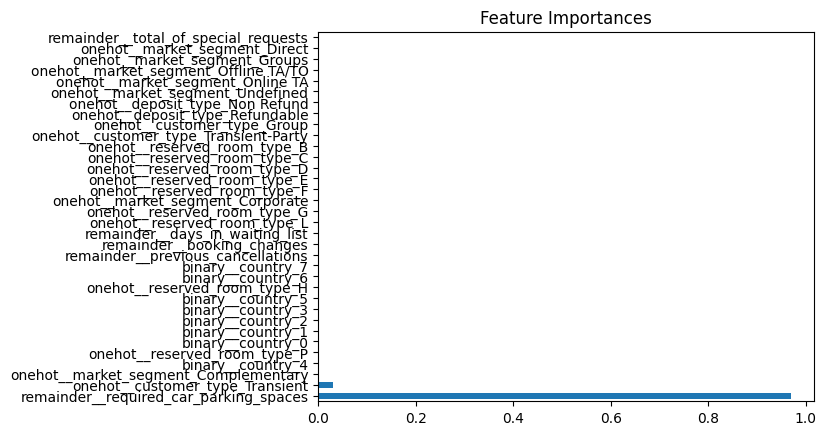

In [57]:
coef1 = pd.Series(final_model['model'].feature_importances_, feature_names).sort_values(ascending = False)
coef1.plot(kind='barh', title='Feature Importances')
plt.show()

**Confusion Matrix**

In [58]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.68      0.79      1558
           1       0.45      0.86      0.59       483

    accuracy                           0.72      2041
   macro avg       0.70      0.77      0.69      2041
weighted avg       0.82      0.72      0.74      2041



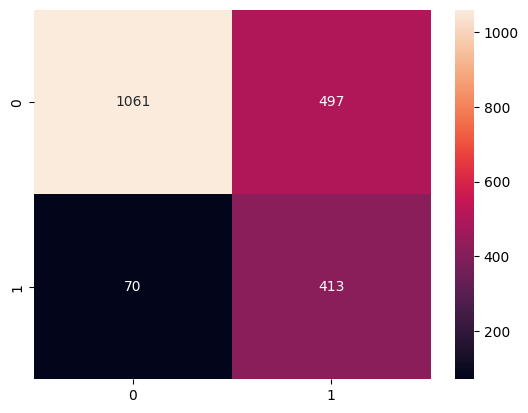

In [59]:
confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='g');

Berdasarkan confusion matrix pada test set di atas terlihat bahwa dengan model yang telah kita buat didapati:
- Jumlah calon pelanggan akan membatalkan pemesanan mereka dan ternyata benar mereka membatalkan pemesanannya (True Positive) : 483 orang
- Jumlah calon pelanggan tidak akan membatalkan pemesanan mereka dan ternyata mereka membatalkan pemesanan mereka (False Negative) : 0 orang
- Jumlah calon pelanggan akan membatalkan pemesanan mereka dan sebenarnya mereka tidak membatalkan pemesanan mereka (True Negative) : 323 orang
- Jumlah calon pelanggan tidak akan membatalkan pemesanan mereka dan sebenarnya mereka tidak membatalkan pemesanan mereka (False Positive) : 1.235 orang

## **Conclusion**

- Diketahui hasil dari hyperparameter tuning bahwa parameter terbaik yang dapat digunakan dengan benchmark **model Ada boost** adalah :
                - **model__n_estimators: 219**
                - **model__learning_rate: 0.05**
                - **model__algorithm: 'SAMME'**

                
- Berdasarkan dari pemodelan yang sudah dilakukan , feature `customer_type_transient`, dan `required_parking_space` menjadi feature yang paling berpengaruh terhadap Target
- Metric evaluasi yang digunakan pada model ini adalah recall score. Jika dilihat bahwa hasilnya adalah 1 itu menandakan bahwa model ini berhasil membaca bahwa jumlah calon pelanggan tidak akan membatalkan pemesanan mereka dan ternyata mereka membatalkan pemesanan mereka menjadi 0.


## **Recomendation**

- Sebaiknya cancellation policy hotel bisa lebih di perketat lagi agar para customer tidak seenaknya untuk melakukan pembatalan.
- Jika ada pelanggan yang membatalkan pemesanan kamar, sebaiknya pihak hotel langsung follow up ke pelanggan lain bahwa ada kamar kosong yang bisa di pesan agar perusahaan tidak kehilangan pendapatan.
- Pihak perusahaan juga dapat melakukan diskon terhadap kamar tertentu karena para pelanggan pasti cenderung memilih kamar yang termurah
- Menambahkan kolom price per room agar kita bisa mengetahui tipe room apa aja yang paling banyak di cancel agar kita bisa menyusun strategi bisnis dan marketing yang baik
- Kebijakan seperti apa yang perusahaan gunakan agar kita bisa menganalisa lebih lanjut mengenai turun naiknya revenue perusahaan
- Model Machine Learning ini tidak disarankan jika demand terhadap hotel rendah, dikarenakan nanti kita akan cenderung menolak pelanggan yang berpotensial untuk menginap.

In [ ]:
import pickle

In [ ]:
# saving model

# best model
final_model = random_adaboost.best_estimator_

# fitting to all data
final_model.fit(X, y)

# save
pickle.dump(final_model, open('model_adaboost_for_cancelation_hotel.sav', 'wb'))